![Header](https://storage.googleapis.com/kaggle-datasets-images/33180/43520/718447d8c4f7e29f129c25b44b324efa/dataset-cover.jpg?t=2018-06-25-11-44-45)

In [1]:
# Kütüphanelerin Yüklenmesi

In [1]:
# Temel Kütüphaneler
import numpy as np
import pandas as pd

# Görselleştirme
import seaborn as sns # çizim için
import matplotlib.pyplot as plt

# Model Kurma
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn import preprocessing


In [2]:
# Verinin çağırılması
# Bu aşamada verimizi içeri alıyoruz ardından değişkenlerin kısaltmalarının anlamlarını ve hangi değerleri aldığını açıklıyoruz.

In [3]:
df = pd.read_csv("heart.csv")

In [4]:
# Verimize bakalım.#UCI veri seti
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
#age (Yaş)
#sex (Cinsiyet)
#cp (Göğüs Ağrısı Türü)
#trestbps (Dinlenme Kan Basıncı)
#chol (Kolesterol)
#fbs (Açlık Kan Şekeri)
#restecg (Dinlenme Elektrokardiyografisi)
#thalach (Maksimum Kalp Atış Hızı)
#exang (Egzersiz ile Tetiklenen Göğüs Ağrısı)
#oldpeak (Egzersizden Kaynaklanan ST Depresyonu)
#slope (ST Segmentinin Eğimi)
#ca (Major Damarların Sayısı)
#thal (ST Segmenti Anomalisinin Türü)
#target (Hedef Değişken - Kalp Hastalığı Var mı?)

In [1]:
#Veri Analizi ve Veri Görselleştirme

In [7]:
# Bu bölümde değişkenlere ait değerleri ve değişkenlerin kendi içerisindeki karşılaştırmalarına bakacağız. Ardından değişken içerisindeki değerlerin karşılaştırmalı grafiğini çizdireceğiz.

## Hasta olanlar ve olmayanların dağılımı
Burada **1** ile gösterilenler kalp hastalığı olanları, **0** ile gösterilenler ise kalp rahatsızlığı olmayanları verir.

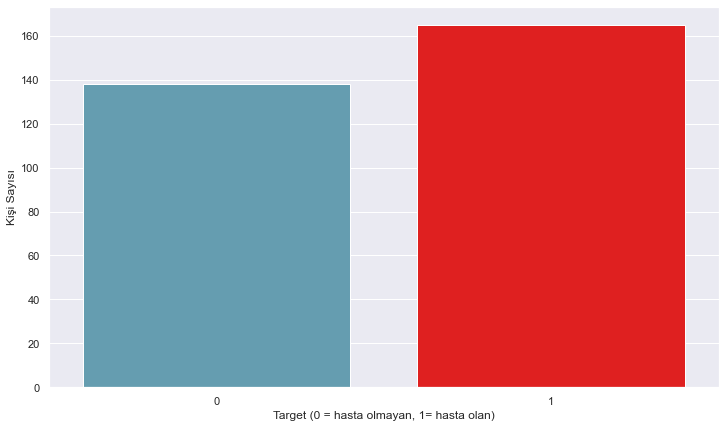

In [15]:
# Matplotlib ve Seaborn kütüphanesi
color = ["#58a3bc","red"]
plt.figure(figsize=(12,7)) #boyut
sns.set() #seaborn varsayılan stili
sns.countplot(x="target",
              data=df,
              palette=color)
plt.ylabel("Kişi Sayısı")
plt.xlabel("Target (0 = hasta olmayan, 1= hasta olan)")



plt.savefig('Hastalık.png',transparent=True) # transparent arka planın şeffaf olarak kaydedilmesini sağlar.
plt.show()

In [16]:
# Hasta olanlar ve olmayanların yüzdelik dağılımları

In [17]:
countNoDisease = len(df[df.target == 0]) # hastalığı olmayanların sayısı
countHaveDisease = len(df[df.target == 1]) # hastalığı olanların sayısı

print("Kalp Rahatsızlığı olmayan hastaların yüzdesi: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Kalp Rahatsızlığı olan hastaların yüzdesi: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Kalp Rahatsızlığı olmayan hastaların yüzdesi: 45.54%
Kalp Rahatsızlığı olan hastaların yüzdesi: 54.46%


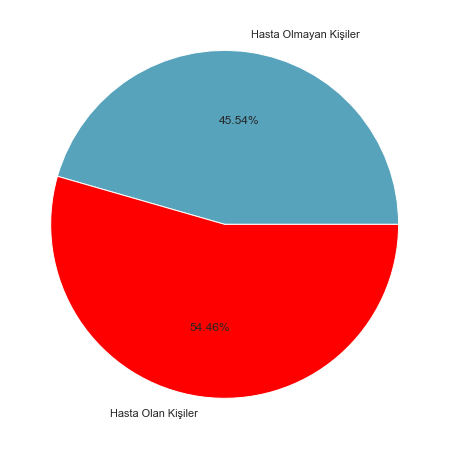

In [18]:
plt.figure(figsize=(8,8)) #grafik boyutu
color = ["#58a3bc","red"]
plt.pie([countNoDisease,countHaveDisease], #pasta grafiği
        labels=["Hasta Olmayan Kişiler","Hasta Olan Kişiler"],
        colors=color,
        autopct='%1.2f%%'); #pasta dilimlerinin yüzdesini gösterir


plt.savefig('Hastalık1.png',transparent=True)

## Veri setimizdeki cinsiyet dağılımı

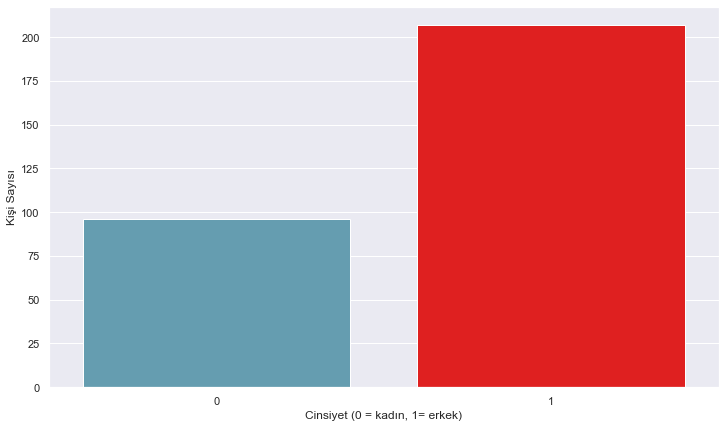

In [19]:
plt.figure(figsize=(12,7))
sns.set()
sns.countplot(x='sex', data=df, palette=color)
plt.xlabel("Cinsiyet (0 = kadın, 1= erkek)")
plt.ylabel("Kişi Sayısı")
plt.savefig('cinsiyet.png',transparent=True)

plt.show()

In [20]:
countFemale = len(df[df.sex == 0]) # kadınların sayısı
countMale = len(df[df.sex == 1]) # erkeklerin sayısı
print("Kadın hastaların yüzdesi: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Erkek hastaların yüzdesi: {:.2f}%".format((countMale / (len(df.sex))*100)))

Kadın hastaların yüzdesi: 31.68%
Erkek hastaların yüzdesi: 68.32%


## Hastalık durumuna göre diğer değişkenlerin ortalama değerleri

Hastalık durumuna göre bir gruplandırma işlemi yapılmıştır.

In [21]:
df.groupby('target').mean() #verilerin ortalaması hesaplanır

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


## Yaşlara göre Kalp Rahatsızlığı olup olmaması

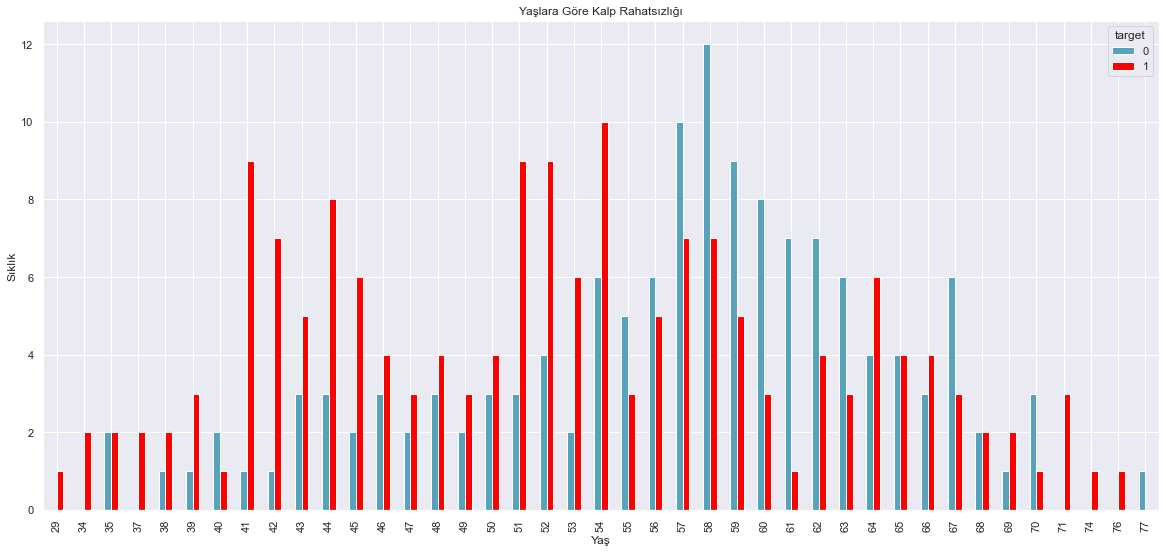

In [24]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,9),color=color) #bar çubuk grafik tipi
plt.title('Yaşlara Göre Kalp Rahatsızlığı')
plt.xlabel('Yaş')
plt.ylabel('Sıklık')
plt.savefig('heartDiseaseAndAges.png',transparent=True)
plt.show()

## Cinsiyete göre Kalp rahatsızlığı olup olmaması

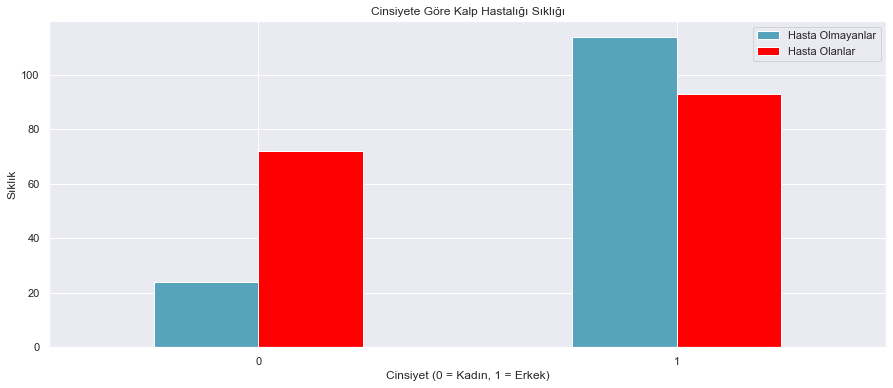

In [25]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=color)
plt.title('Cinsiyete Göre Kalp Hastalığı Sıklığı')
plt.xlabel('Cinsiyet (0 = Kadın, 1 = Erkek)')
plt.xticks(rotation=0)
plt.legend(["Hasta Olmayanlar", "Hasta Olanlar"])
plt.ylabel('Sıklık')
plt.savefig('cinsiyetegörehastalık.png',transparent=True)


plt.show()

## Maksimum Kalp Atış Hızı ve Yaş Arasında Hastalık Dağılımı

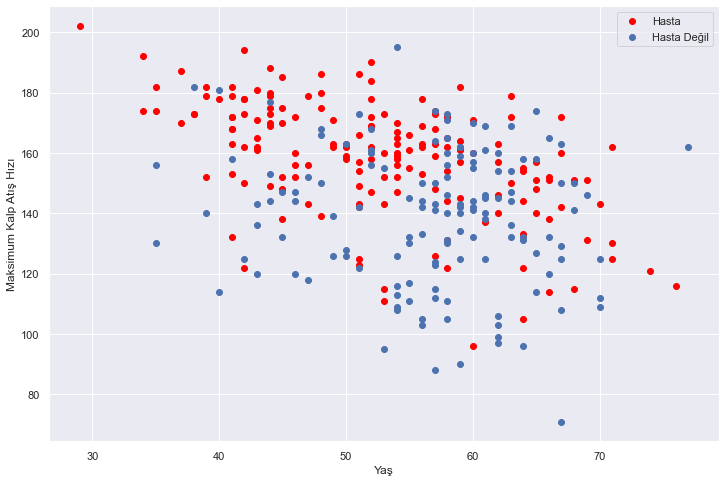

In [27]:
plt.figure(figsize=(12,8))
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Hasta", "Hasta Değil"])
plt.xlabel("Yaş")
plt.ylabel("Maksimum Kalp Atış Hızı")
plt.show()

## Slope Değişkenine Göre Hastalık Sıklığı

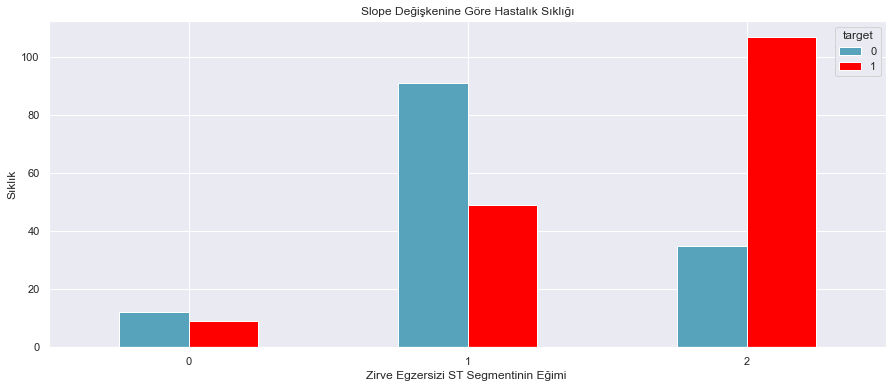

In [30]:
color = ["#58a3bc","red"]
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=color)
plt.title('Slope Değişkenine Göre Hastalık Sıklığı')
plt.xlabel('Zirve Egzersizi ST Segmentinin Eğimi ')
plt.xticks(rotation = 0)
plt.ylabel('Sıklık')
plt.savefig('slope.png',transparent=True)

#shope(eğim): zirve egzersiz ST segmentinin eğimi (Değer 0: yukarı eğimli, Değer 1: düz, Değer 2: aşağı eğimli)
plt.show()

## Açlık Kan Şekerine Göre Kalp Hastalığı Sıklığı

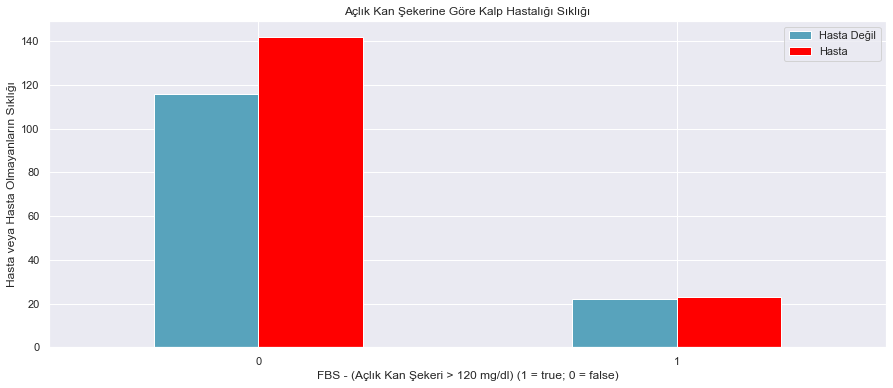

In [32]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=color)
plt.title('Açlık Kan Şekerine Göre Kalp Hastalığı Sıklığı')
plt.xlabel('FBS - (Açlık Kan Şekeri > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Hasta Değil", "Hasta"])
plt.ylabel('Hasta veya Hasta Olmayanların Sıklığı')
plt.savefig('açlık.png',transparent=True)

#Bu, genel olarak toplumdaki insanların çoğunluğunun açlık kan şekeri seviyesinin düşük olduğunu göstermektedir.
#0 Açlık Kan Şekeri < 120 mg/dl  , 1 Açlık Kan Şekeri > 120 mg/dl
plt.show()

## Göğüs Ağrısı Tipine Göre Halp Hastalığı Sıklığı

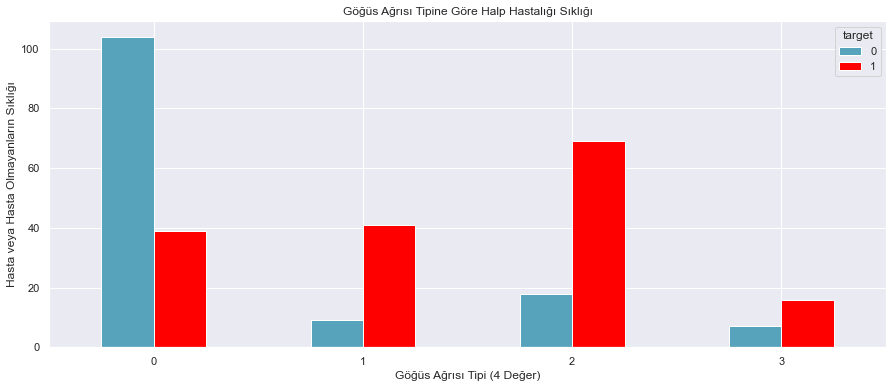

In [34]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=color)
plt.title('Göğüs Ağrısı Tipine Göre Halp Hastalığı Sıklığı')
plt.xlabel('Göğüs Ağrısı Tipi (4 Değer)')
plt.xticks(rotation = 0)
plt.ylabel('Hasta veya Hasta Olmayanların Sıklığı')
plt.savefig('göğüs.png',transparent=True)


plt.show()

In [35]:
# Kategorik Değişkenlerin Dönüştürülmesi

In [36]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#İlk bakışta **sex, cp, fbs, restecg, exang, slope, ca ve thal** değişkenlerinin kategorik olduklarını görüyoruz. 

In [37]:
print("""
Sex değişkeni eşsiz değerleri: {}
Cp değişkeni eşsiz değerleri: {}
Fbs değişkeni eşsiz değerleri: {}
Restecg değişkeni eşsiz değerleri: {}
Exang değişkeni eşsiz değerleri: {}
Slope değişkeni eşsiz değerleri: {}
Ca değişkeni eşsiz değerleri: {}
Thal değişkeni eşsiz değerleri: {}
""".format(df.sex.unique(),
           df.cp.unique(),
           df.fbs.unique(),
           df.restecg.unique(),
           df.exang.unique(),
           df.slope.unique(),
           df.ca.unique(),
           df.thal.unique()))


Sex değişkeni eşsiz değerleri: [1 0]
Cp değişkeni eşsiz değerleri: [3 2 1 0]
Fbs değişkeni eşsiz değerleri: [1 0]
Restecg değişkeni eşsiz değerleri: [0 1 2]
Exang değişkeni eşsiz değerleri: [0 1]
Slope değişkeni eşsiz değerleri: [0 2 1]
Ca değişkeni eşsiz değerleri: [0 2 1 3 4]
Thal değişkeni eşsiz değerleri: [1 2 3 0]



Burada **cp, restecg, slope, ca ve thal** değişkenlerinin **0 - 1** haricinde değerlere sahip olduklarını görüyoruz. Bu değişkenlere **get_dummies()** metodunu uygulamadan önce *tiplerine* bakalım. **get_dummies()** metodu obje yada categorik tipleri dönüştürdüğü için içerisinde numerik tipe sahip değişkenlerin dönüşümlerini gerçekleştirelim.

In [38]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
#Değişkenlerin Kategorik tiplere dönüştürülmesi.

In [39]:
df.cp = pd.Categorical(df.cp)
df.restecg = pd.Categorical(df.restecg)
df.slope = pd.Categorical(df.slope)
df.ca = pd.Categorical(df.ca)
df.thal = pd.Categorical(df.thal)

In [40]:
df.dtypes

age            int64
sex            int64
cp          category
trestbps       int64
chol           int64
fbs            int64
restecg     category
thalach        int64
exang          int64
oldpeak      float64
slope       category
ca          category
thal        category
target         int64
dtype: object

In [ ]:
#Artık **get_dummies()** metodunu kullanabiliriz. 

In [41]:
df = pd.get_dummies(df, drop_first=True)#drop_first=True` paremetresi dönüştürülen değişkenlerin çıkartılmasını sağlayacak.

In [42]:
df = df[['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
         'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2', 'slope_1',
         'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1', 'thal_2',
         'thal_3','target']]

In [43]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_1,cp_2,...,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3,target
0,63,1,145,233,1,150,0,2.3,0,0,...,0,0,0,0,0,0,1,0,0,1
1,37,1,130,250,0,187,0,3.5,0,1,...,0,0,0,0,0,0,0,1,0,1
2,41,0,130,204,0,172,0,1.4,1,0,...,0,1,0,0,0,0,0,1,0,1
3,56,1,120,236,0,178,0,0.8,1,0,...,0,1,0,0,0,0,0,1,0,1
4,57,0,120,354,0,163,1,0.6,0,0,...,0,1,0,0,0,0,0,1,0,1


# Modelin Uygulanması

In [ ]:
#Modellerin uygulanmasından önce veri setimizi **train ve test** olarak ayıralım.

#Bu aşamada %80 eğitim ve %20 test olarak veri setimizi rassal olarak ayırıyoruz.

#Aynı rassal değişkenleri yakalamak için bir `random_state` atıyoruz.

## Logistic Regression

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
                                   df.drop('target', axis=1), # target hariç veri setinin tamamı X
                                   df['target'], # target Y
                                   test_size = .2, # %80 train %20 test olmak üzere ayırdık.
                                   random_state=1905)
lr = LogisticRegression()
lr.fit(X_train,y_train) #öğreniyor
print("Test Accuracy {:.2f}%".format(lr.score(X_test,y_test)*100))

Test Accuracy 88.52%


C:\Users\susamgunes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Modelimin doğruluğu **88.52%** olarak görülüyor.

In [ ]:
#Normelleştirme
#Normalleştirme her bir değişkenin maksimum ve minimum değerlerini **0-1** arasında gösterir.

In [45]:
X = df.drop('target',axis=1) # X
y = df.target # y

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X_normalized = pd.DataFrame(np_scaled)
X_normalized.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.708333,1.0,0.481132,0.244292,1.0,0.603053,0.0,0.370968,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,1.0,0.339623,0.283105,0.0,0.885496,0.0,0.564516,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.770992,0.0,0.225806,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.562500,1.0,0.245283,0.251142,0.0,0.816794,0.0,0.129032,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.583333,0.0,0.245283,0.520548,0.0,0.702290,1.0,0.096774,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [56]:
X_train, X_test, y_train, y_test = train_test_split(
                                   X_normalized, # target hariç veri setinin tamamı (X)
                                   y, # target (Y)
                                   test_size = .2, # %80 train %20 test olmak üzere ayırdık.
                                   random_state=1905)
lr = LogisticRegression()
lr.fit(X_train,y_train) #öğreniyor

lr_score = lr.score(X_test,y_test) #performans ölçümü
print("Test Accuracy {:.2f}%".format(lr_score*100))

Test Accuracy 90.16%


In [ ]:
# Normelleştirme sonrasında **88.52%** olan sonucum **90.16%** yükseldi.

In [ ]:
## K-Nearest Neighbour (KNN) Classification

#Tahminlerin gözlem benzerliğine göre yapılmasıdır.

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
                                   X_normalized, # target hariç veri setinin tamamı (X)
                                   y, # target (Y)
                                   test_size = .2, # %80 train %20 test olmak üzere ayırdık.
                                   random_state=1905)
# KNN Model
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_train, y_train) #eğitiliyor
prediction = knn.predict(X_test) #tahminler yapılır

knn_score = knn.score(X_test, y_test)
print("{} NN Score: {:.2f}%".format(knn.n_neighbors, knn_score*100))


2 NN Score: 81.97%


In [ ]:
### `n_neighbors = 2` olduğunda skorum: 81.97%

### En iyi n_neighbors değerini bulma

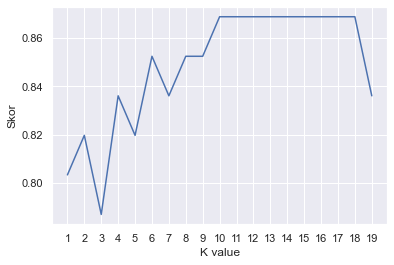

Maximum KNN Score is 86.89%


In [48]:
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))

sns.set()    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Skor")
plt.savefig('kvalue.png',transparent=True)
plt.show()

knn_score = max(scoreList)
print("Maximum KNN Score is {:.2f}%".format((max(scoreList))*100))

### Maksimum KNN skorum 86.89% 

## Support Vector Machine (SVM) Algorithm 

In [49]:
svm = SVC(random_state = 1)
svm.fit(X_train, y_train)
svm_score = svm.score(X_test,y_test)
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(svm_score*100))

Test Accuracy of SVM Algorithm: 83.61%


## Naive Bayes Algorithm

In [50]:
nb = GaussianNB()
nb.fit(X_train, y_train)

nb_score = nb.score(X_test,y_test)
print("Accuracy of Naive Bayes: {:.2f}%".format(nb_score*100))

Accuracy of Naive Bayes: 88.52%


In [ ]:
## Decision Tree Algorithm

#Normalleştirilmemiş veri setiyle daha yüksek skor yakalandı.

In [51]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), # target hariç veri setinin tamamı (X)
                                   y, # target (Y)
                                   test_size = .2, # %80 train %20 test olmak üzere ayırdık.
                                   random_state=1905)
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

dtc_score = dtc.score(X_test, y_test)
print("Decision Tree Test Accuracy {:.2f}%".format(dtc_score*100))

Decision Tree Test Accuracy 78.69%


## Random Forest Classification

In [52]:
# Random Forest Classification
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)

rf_score = rf.score(X_test, y_test)
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(rf_score*100))

Random Forest Algorithm Accuracy Score : 78.69%


In [53]:
methods_accuracy = {
    "Logistic Regression":lr_score,
    "KNN" : knn_score,
    "SVM" : svm_score,
    "Naive Bayes" : nb_score,
    "Decision Tree" : dtc_score,
    "Random Forest" : rf_score
}

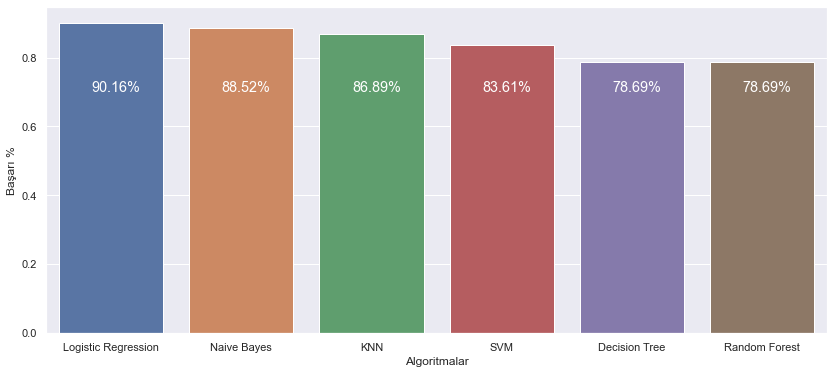

In [54]:
methods = ["Logistic Regression","Naive Bayes", "KNN", "SVM", "Decision Tree", "Random Forest"]
accuracy = [lr_score, nb_score, knn_score, svm_score, dtc_score, rf_score]

sns.set()
plt.figure(figsize=(14,6))
plt.ylabel("Başarı %")
plt.xlabel("Algoritmalar")
sns.barplot(x=methods, y=accuracy, palette="deep")

# Kırılımlar Üzerine Değerlerini Yazmak
for line in range(len(methods)):
     plt.text(line-0.15, # x
              0.70, # y
             "{:.2f}%".format(accuracy[line]*100), # yazdırılacak değer
             horizontalalignment='left',
              size='large',
             color="white",
             )

        
plt.savefig('karşılaştır.png',transparent=True)

        
plt.show()